<a href="https://colab.research.google.com/github/cardstdani/linalg/blob/main/TF_Linalg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Modules installation and Setup**

The following cells are reserved for the installation of the necesary modules along the rest of following Notebook operations.<br> -To properly configure the **execution runtime**, please execute one by one the next cluster of cells. <br>Note that one of them restarts the environment, so you may have to wait a few seconds before running the next cell.

In [1]:
%%capture
!pip install ipympl
get_ipython().kernel.do_shutdown(True)

**Setup**

In [1]:
from google.colab import output
output.enable_custom_widget_manager()

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import numpy as np
import random
%matplotlib widget
matplotlib.interactive(True)

In [2]:
print(tf.__version__)

2.8.2


In [25]:
#Only use this line to close all opened figures
plt.close('all')

##**Scalars, Vectors, and the first dimensions**

<div class="markdown-google-sans">
  <h1><b>0 dimension</b></h1>

If we first take a look at the first possible space dimension, we will find that everything existing in it is condensed into a fixed <b>point</b>.

  We can consider the represented point as a <b>scalar</b> value since it contains a numeric parameter <i>(int32, float64, double, complex128...)</i>

$V=scalarValue$.
</div>

In [3]:
#@title `Show/Hide code` { run: "auto" }

scalar = 90 #@param {type:"number"}
numericType = "quint16" #@param ['bfloat16', 'bool', 'cast', 'complex', 'complex128', 'complex64', 'double', 'float16', 'float32', 'float64', 'half', 'int16', 'int32', 'int64', 'int8', 'qint16', 'qint32', 'qint8', 'quint16', 'quint8', 'resource', 'saturate_cast', 'string', 'uint16', 'uint32', 'uint64', 'uint8', 'variant']

tensorType = eval("tf."+numericType)
try:
  t = tf.constant(scalar, dtype=tensorType)
  print(t)
except Exception as e:
  print(e)

tf.Tensor(90, shape=(), dtype=quint16)


<div class="markdown-google-sans">
  <h1><strong>1 dimension</strong></h1>

In the first dimension, we can represent the scalar quantity of the previous dimension as a <b>point</b> in a line. 

Thus, considering the origin at value <b>[0]</b>, a vector of 1 dimension is an object with only one <b>axis component</b> <i>(coordinate)</i> which stands for the distance between origin and scalar point. 

$V=[scalarValueX] \in \mathcal{R}^1$.
</div>

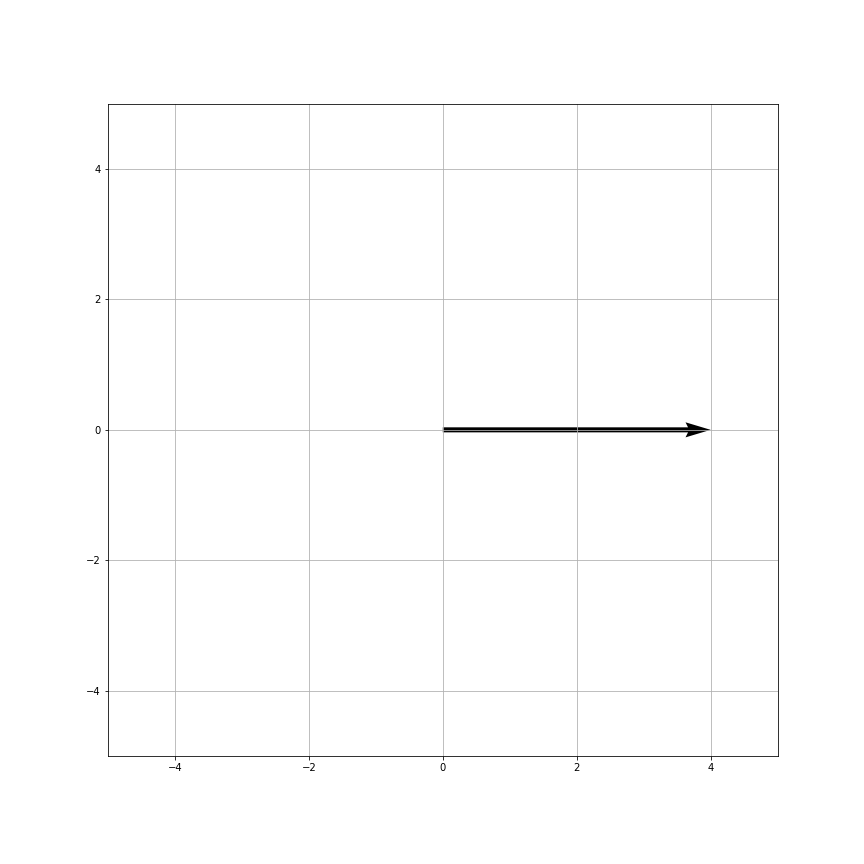

In [6]:
#@title `Show/Hide code` { run: "auto" }

vectorValue = "[4]" #@param {type:"string"}
color = "000000" #@param {type:"string"}

t = tf.constant(eval(vectorValue))

fig = plt.figure(figsize=(12, 12))
plt.quiver(t, 0, angles='xy', scale_units='xy', scale=1, color="#"+color)

l = np.max(t)+1
plt.xlim([-l, l])
plt.ylim([-l, l])
plt.grid()
plt.show()

<div class="markdown-google-sans">
  <h1><strong>2 dimension</strong></h1>

In the second dimension, the vector now has 2 components, one for the horizontal axis and another one for the vertical axis. 

The combination of these components results in an object capable of placing a point in a plane 2d space. To achieve this, the vector object contains two scalar values for the respective axes, instead of only one.
<br><br>
$V=[scalarValueX, scalarValueY] \in \mathcal{R}^2$

* scalarValueX=Horizontal distance from origin to point

* scalarValueY=Vertical distance from origin to point
</div>

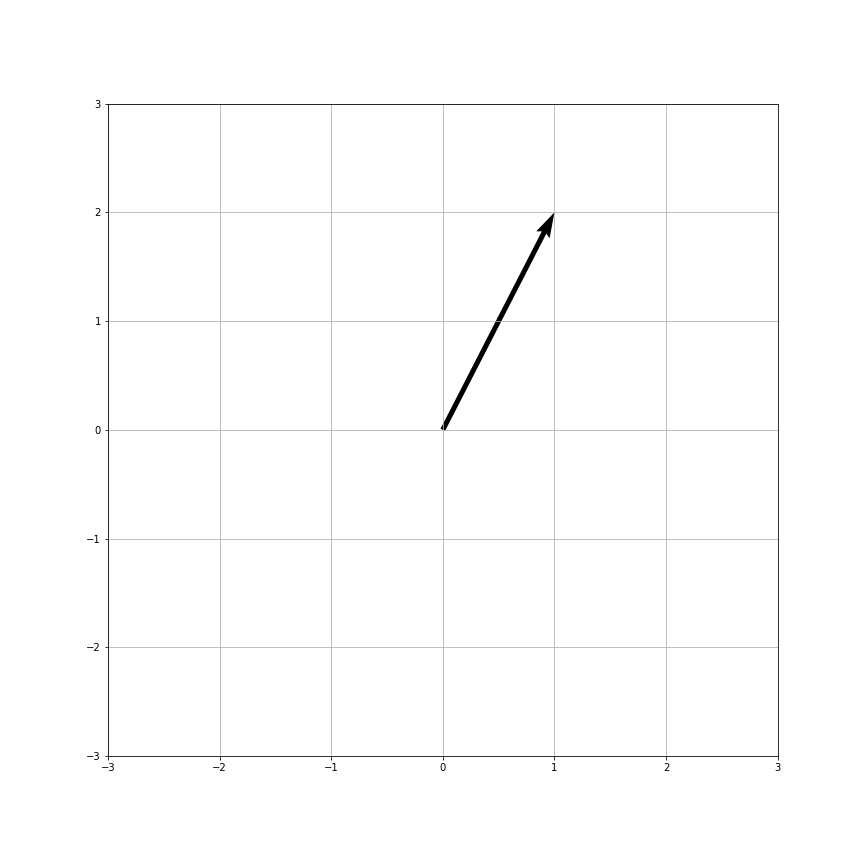

In [14]:
#@title `Show/Hide code` { run: "auto" }

vectorValue = "[1, 2]" #@param {type:"string"}
color = "000000" #@param {type:"string"}

t = tf.constant(eval(vectorValue))

fig = plt.figure(figsize=(12, 12))
plt.quiver(0, 0, t[0], t[1], angles='xy', scale_units='xy', scale=1, color="#"+color)

l = np.max(t)+1
plt.xlim([-l, l])
plt.ylim([-l, l])
plt.grid()
plt.show()

<div class="markdown-google-sans">
  <h1><strong>3 dimension</strong></h1>

Finally, with 3 dimensions, the vector has one additional component concerning the previous example. 
<br><br>
$V=[scalarValueX, scalarValueY, scalarValueZ] \in \mathcal{R}^3$

* scalarValueX=Horizontal distance from origin to point
* scalarValueY=Vertical distance from origin to point
* scalarValueZ=Depth distance from origin to point
</div>

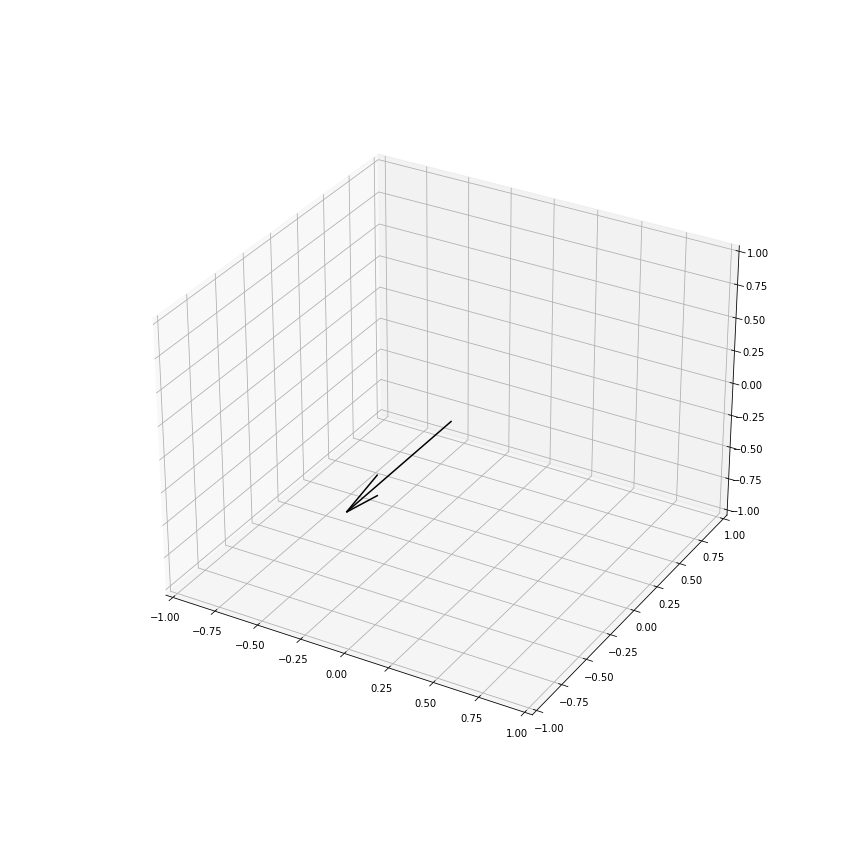

In [26]:
#@title `Show/Hide code` { run: "auto" }

vectorValue = "[0, -1, 0]" #@param {type:"string"}
color = "000000" #@param {type:"string"}

t = tf.constant(eval(vectorValue))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.quiver(0, 0, 0, t[0], t[1], t[2], color="#"+color)

l = np.max(t)+1
ax.set_xlim([-l, l])
ax.set_ylim([-l, l])
ax.set_zlim([-l, l])
ax.grid()
plt.show()

<div class="markdown-google-sans">
  <h1><strong>n-dimension</strong></h1>

Since we can only visualize the first 3 dimensions in a simple way, we will leave the rest of them for the mathematical representation as a <b>tensor</b> object.
<br><br>
$V=[scalarValueD1, scalarValueD2, scalarValueD3, ...., scalarValueDn] \in \mathcal{R}^n$

* scalarValueDn=N-axis distance from origin to point in n-dimensional space ${R}^n$
</div>

In [27]:
#@title `Show/Hide code` { run: "auto" }

vectorValue = "[1, 2, 3, 1, 8, 9, 9, 9, 9]" #@param {type:"string"}

t = tf.constant(eval(vectorValue))

print(t)

tf.Tensor([1 2 3 1 8 9 9 9 9], shape=(9,), dtype=int32)


<div class="markdown-google-sans">
  <h1><strong>The Concept of Tensor</strong></h1>

---

Now we are capable of representing a point in <b>n-space</b> with a series of scalar values contained inside a vector object of the corresponding <b>n-space</b> $(\mathcal{R}^n)$

But, to properly understand what a Tensor object is, we must first consider a <i>"bigger"</i> structure which allows us to group, cluster, or just store multiple vectors inside a single instance of it.

</div>



##**A vector space in Tensorflow**

(-1.0, 1.0)

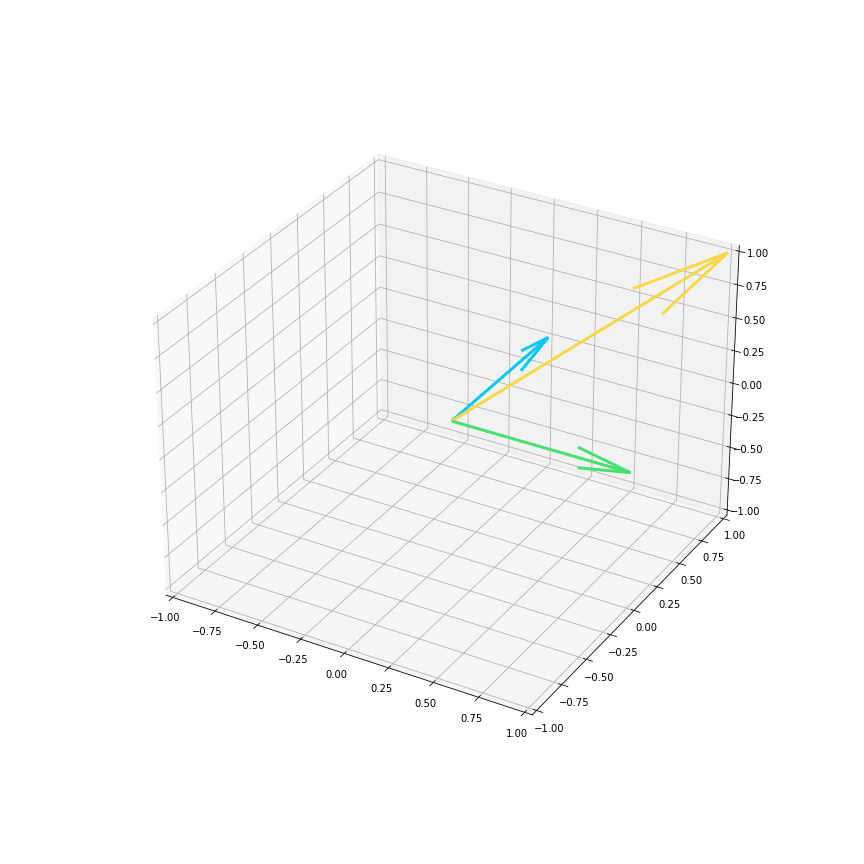

In [ ]:
origin = np.array([0, 0, 0])
vectors = tf.constant([[1, 0, 0], [1, 1, 1], [0, 1, 0]])
colors = ["#48e073", "#f8d849", "#05c9f2"]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for i in range(len(vectors)):
  ax.quiver(origin[0], origin[1], origin[2], vectors[i][0], vectors[i][1], vectors[i][2], arrow_length_ratio=0.3, lw=3, color=colors[i]) 

l = np.max(vectors)
ax.set_xlim([-l, l])
ax.set_ylim([-l, l])
ax.set_zlim([-l, l])

(-1.0, 1.0)

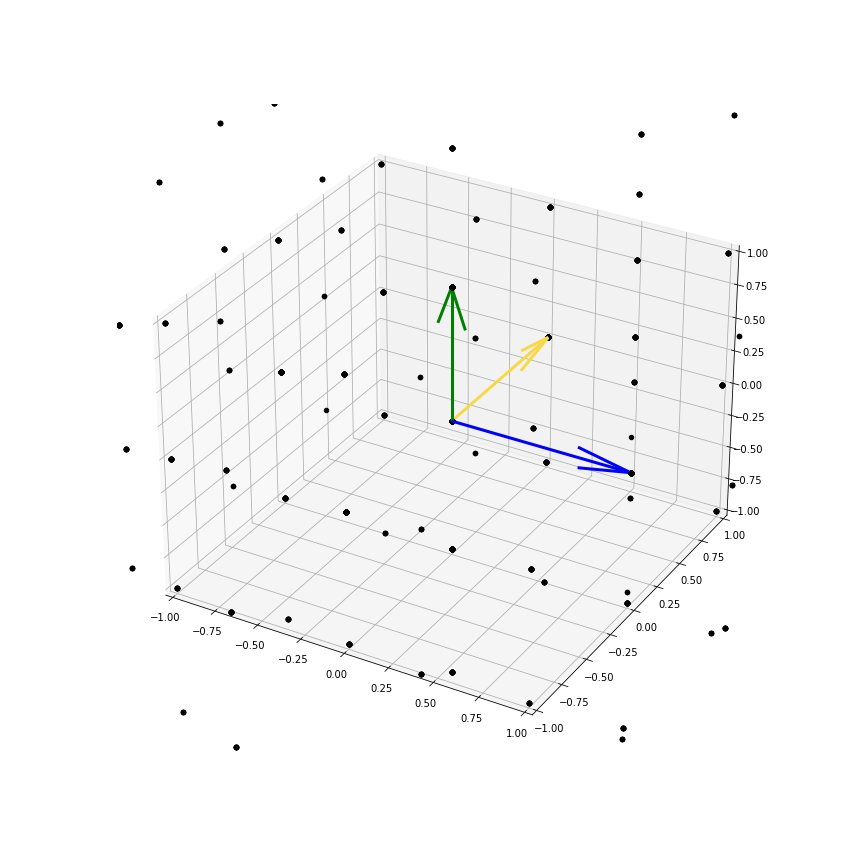

In [ ]:
origin = tf.constant([0, 0, 0])
vectors = tf.constant([[0, 0, 1], 
                       [0, 1, 0], 
                       [1, 0, 0]])

colors = ["g", "#f8d849", "b"]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

for i in range(len(vectors)):
  ax.quiver(origin[0], origin[1], origin[2], vectors[i][0], vectors[i][1], vectors[i][2], arrow_length_ratio=0.3, lw=3, color=colors[i]) 

r = np.linspace(-2, 2, 10)
for i1 in r:
  for i2 in r:
    for i3 in r:
      v = np.array([0, 0, 0])
      for index in range(len(vectors)):
        v = np.add(v, eval("i"+str(index+1))*vectors[index])
      ax.scatter(v[0], v[1], v[2], color="k") 

l = np.max(vectors)
ax.set_xlim([-l, l])
ax.set_ylim([-l, l])
ax.set_zlim([-l, l])